<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/skydiving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# https://www.youtube.com/watch?v=bA16sDvF0xQ

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [70]:
b, m, v_x, v_y, g = smp.symbols('b m v_x v_y g')

In [71]:
dvx_dt = - (b / m) * smp.sqrt(v_x ** 2 + v_y ** 2) * v_x
dvx_dt

-b*v_x*sqrt(v_x**2 + v_y**2)/m

In [72]:
dvy_dt = - g - (b / m) * smp.sqrt(v_x ** 2 + v_y ** 2) * v_y
dvy_dt

-b*v_y*sqrt(v_x**2 + v_y**2)/m - g

In [73]:
vt = -55

fun_x = dvx_dt.subs([(g, 9.81), (m, 80), (b, (80*9.81)/vt**2)])
fun_y = dvy_dt.subs([(g, 9.81), (m, 80), (b, (80*9.81)/vt**2)])

[fun_x, fun_y]

[-0.00324297520661157*v_x*sqrt(v_x**2 + v_y**2),
 -0.00324297520661157*v_y*sqrt(v_x**2 + v_y**2) - 9.81]

In [74]:
nfun_x = smp.lambdify([v_x, v_y], fun_x)
nfun_y = smp.lambdify([v_x, v_y], fun_y)

t = np.linspace(0, 20, 100)
v0x, v0y = 50, 0

def func(s, t):
  vx = s[0]
  vy = s[1]
  return [nfun_x(vx, vy), nfun_y(vx, vy)]

sol = odeint(func, y0=[v0x, v0y], t=t)

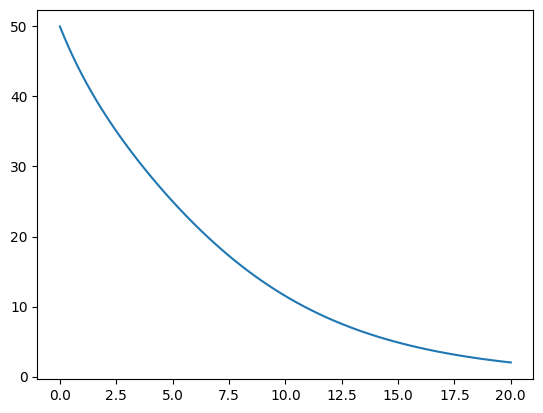

In [75]:
vx = sol.T[0]

plt.plot(t, vx)

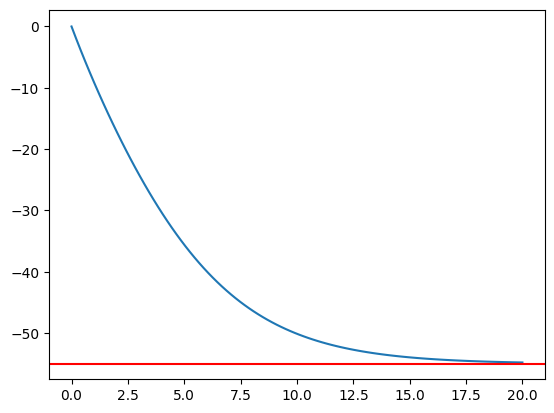

In [76]:
vy = sol.T[1]

plt.plot(t, vy)
plt.axhline(vt, color='r')

In [77]:
ind = np.abs(vy - vt)/np.abs(vt) < 0.01

t[ind]

array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])